In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)

print(findFiles('/content/drive/MyDrive/chrnn_data/data/names/*.txt'))



['/content/drive/MyDrive/chrnn_data/data/names/Chinese.txt', '/content/drive/MyDrive/chrnn_data/data/names/Czech.txt', '/content/drive/MyDrive/chrnn_data/data/names/Dutch.txt', '/content/drive/MyDrive/chrnn_data/data/names/French.txt', '/content/drive/MyDrive/chrnn_data/data/names/German.txt', '/content/drive/MyDrive/chrnn_data/data/names/Greek.txt', '/content/drive/MyDrive/chrnn_data/data/names/Irish.txt', '/content/drive/MyDrive/chrnn_data/data/names/Italian.txt', '/content/drive/MyDrive/chrnn_data/data/names/Japanese.txt', '/content/drive/MyDrive/chrnn_data/data/names/Korean.txt', '/content/drive/MyDrive/chrnn_data/data/names/Portuguese.txt', '/content/drive/MyDrive/chrnn_data/data/names/Polish.txt', '/content/drive/MyDrive/chrnn_data/data/names/Arabic.txt', '/content/drive/MyDrive/chrnn_data/data/names/Scottish.txt', '/content/drive/MyDrive/chrnn_data/data/names/Vietnamese.txt', '/content/drive/MyDrive/chrnn_data/data/names/Spanish.txt', '/content/drive/MyDrive/chrnn_data/data/name

In [ ]:
import unicodedata
import string

all_letters = string.ascii_letters + " .,:'"
n_letters = len(all_letters)

# Turn a Unicode string to plain ASCII
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

Slusarski


In [ ]:
# Build the category_lines dictionary, a list of names per language

category_lines = {}
all_categories = []

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]


In [ ]:
for filename in findFiles('/content/drive/MyDrive/chrnn_data/data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines
    print(category)
    print(lines)

Chinese
['Ang', 'AuYong', 'Bai', 'Ban', 'Bao', 'Bei', 'Bian', 'Bui', 'Cai', 'Cao', 'Cen', 'Chai', 'Chaim', 'Chan', 'Chang', 'Chao', 'Che', 'Chen', 'Cheng', 'Cheung', 'Chew', 'Chieu', 'Chin', 'Chong', 'Chou', 'Chu', 'Cui', 'Dai', 'Deng', 'Ding', 'Dong', 'Dou', 'Duan', 'Eng', 'Fan', 'Fei', 'Feng', 'Foong', 'Fung', 'Gan', 'Gauk', 'Geng', 'Gim', 'Gok', 'Gong', 'Guan', 'Guang', 'Guo', 'Gwock', 'Han', 'Hang', 'Hao', 'Hew', 'Hiu', 'Hong', 'Hor', 'Hsiao', 'Hua', 'Huan', 'Huang', 'Hui', 'Huie', 'Huo', 'Jia', 'Jiang', 'Jin', 'Jing', 'Joe', 'Kang', 'Kau', 'Khoo', 'Khu', 'Kong', 'Koo', 'Kwan', 'Kwei', 'Kwong', 'Lai', 'Lam', 'Lang', 'Lau', 'Law', 'Lew', 'Lian', 'Liao', 'Lim', 'Lin', 'Ling', 'Liu', 'Loh', 'Long', 'Loong', 'Luo', 'Mah', 'Mai', 'Mak', 'Mao', 'Mar', 'Mei', 'Meng', 'Miao', 'Min', 'Ming', 'Moy', 'Mui', 'Nie', 'Niu', 'OuYang', 'OwYang', 'Pan', 'Pang', 'Pei', 'Peng', 'Ping', 'Qian', 'Qin', 'Qiu', 'Quan', 'Que', 'Ran', 'Rao', 'Rong', 'Ruan', 'Sam', 'Seah', 'See ', 'Seow', 'Seto', 'Sha', 'Sh

In [ ]:
n_categories = len(all_categories)
n_categories

18

In [ ]:
print(category_lines['Italian'][:5])

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


In [ ]:
import torch

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor


# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor


In [ ]:
print(letterToTensor('J'))

print(lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


In [ ]:
print(lineToTensor('Jones'))

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

In [ ]:
import torch

tensor = torch.zeros(len([1, 2]), 1, 4)
tensor

tensor([[[0., 0., 0., 0.]],

        [[0., 0., 0., 0.]]])

In [ ]:
tensor.shape

torch.Size([2, 1, 4])

In [ ]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)


    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.h2o(hidden)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)


In [ ]:
n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [ ]:
n_letters

57

In [ ]:
input = letterToTensor('A')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)
print(input)
print(hidden)
print(output)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]])
tensor([[-2.8192, -2.9313, -2.9706, -2.8496, -2.8390, -2.9590, -2.8972, -2.8431,
         -2.9014, -2.9529, -2.8701, -2.8305, -2.9021, -2.8111, -2.9676, -2.9184,
    

In [ ]:
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-2.8192, -2.9313, -2.9706, -2.8496, -2.8390, -2.9590, -2.8972, -2.8431,
         -2.9014, -2.9529, -2.8701, -2.8305, -2.9021, -2.8111, -2.9676, -2.9184,
         -2.9185, -2.8686]], grad_fn=<LogSoftmaxBackward0>)


In [ ]:
print(input)

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

In [ ]:
print(input[0])

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])


In [ ]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    # print("Greatest value : ", top_n)
    # print("Index of the greatest value : ", top_i)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

In [ ]:
print(categoryFromOutput(output))

('Scottish', 13)


In [ ]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

In [ ]:
for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = Polish / line = Kaminski
category = Dutch / line = Smets
category = Korean / line = Sung
category = Dutch / line = Andringa
category = Korean / line = Noh
category = Spanish / line = Antunez
category = Arabic / line = Sleiman
category = Vietnamese / line = Pho
category = Italian / line = Baglio
category = English / line = Holmes


In [ ]:
all_categories

['Chinese',
 'Czech',
 'Dutch',
 'French',
 'German',
 'Greek',
 'Irish',
 'Italian',
 'Japanese',
 'Korean',
 'Portuguese',
 'Polish',
 'Arabic',
 'Scottish',
 'Vietnamese',
 'Spanish',
 'English',
 'Russian']

In [ ]:
torch.tensor([all_categories.index('Dutch')], dtype=torch.long)

tensor([2])

In [ ]:
criterion = nn.NLLLoss()

In [ ]:
learning_rate = 0.005

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [ ]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000

# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


In [ ]:
start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print ``iter`` number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 9s) 2.9045 Prinsen / Russian ✗ (Dutch)
10000 10% (0m 16s) 3.3714 Espinosa / Japanese ✗ (Spanish)
15000 15% (0m 23s) 0.8447 Hajek / Czech ✓
20000 20% (0m 30s) 1.4305 Magro / Portuguese ✗ (Italian)
25000 25% (0m 37s) 0.4106 Sardelis / Greek ✓
30000 30% (0m 44s) 0.5937 Trnkova / Czech ✓
35000 35% (0m 51s) 0.7038 Forest / French ✓
40000 40% (0m 58s) 1.0957 Cao / Vietnamese ✓
45000 45% (1m 5s) 2.8402 Mclaughlin / Korean ✗ (Scottish)
50000 50% (1m 12s) 3.2316 O'Driscoll / Czech ✗ (Irish)
55000 55% (1m 19s) 1.1030 Desjardins / French ✓
60000 60% (1m 26s) 0.8630 Handal / Arabic ✓
65000 65% (1m 33s) 3.8877 Janoch / Irish ✗ (Czech)
70000 70% (1m 41s) 3.2613 Iniguez / Polish ✗ (Spanish)
75000 75% (1m 47s) 0.9981 Moon / Korean ✓
80000 80% (1m 55s) 0.0320 Takudo / Japanese ✓
85000 85% (2m 1s) 1.3410 Santiago / Portuguese ✗ (Spanish)
90000 90% (2m 9s) 0.4517 Mitchell / Scottish ✓
95000 95% (2m 15s) 1.0451 Mizuno / Japanese ✓
100000 100% (2m 23s) 0.2880 Aiolfi / Italian ✓


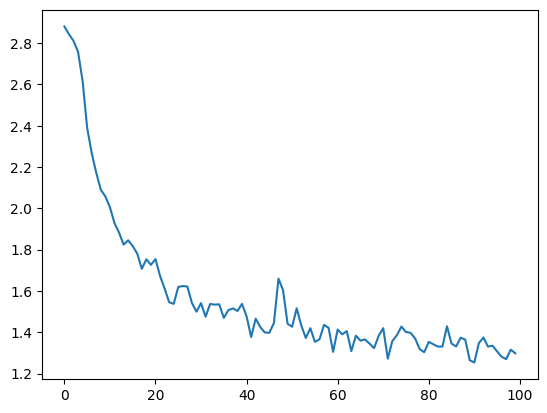

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

<ipython-input-88-59291984fac6>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_categories, rotation=90);
<ipython-input-88-59291984fac6>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_categories);


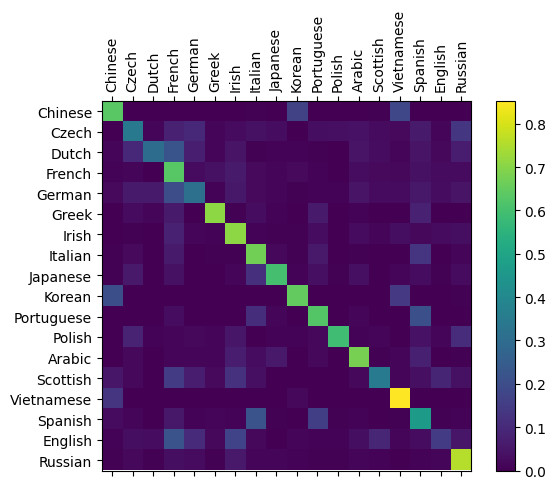

In [ ]:
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()


# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90);
ax.set_yticklabels([''] + all_categories);

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show();

In [ ]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])


In [ ]:
predict('Dovesky')
predict('Jackson')
predict('Satoshi')
predict('Asaad')
predict('Areeb')
predict('Tanzeel')
predict('Rafey')
predict('Tahir')


> Dovesky
(-0.08) Russian
(-3.26) Czech
(-3.63) English

> Jackson
(-0.34) Scottish
(-2.19) English
(-2.76) Russian

> Satoshi
(-0.62) Japanese
(-1.00) Italian
(-3.10) Arabic

> Asaad
(-0.01) Arabic
(-5.11) Irish
(-5.87) French

> Areeb
(-0.18) Arabic
(-3.02) Portuguese
(-3.38) Spanish

> Tanzeel
(-1.60) Spanish
(-1.74) Dutch
(-1.75) French

> Rafey
(-1.21) Irish
(-1.48) French
(-2.17) Czech

> Tahir
(-0.04) Arabic
(-5.04) Irish
(-5.05) German


In [ ]:
file = 'data/names/arabic.txt'
file.split('/')[-1].split('.')[0]

'arabic'

# Exercises

- Try with a different dataset of line -> category, for example:

    - Any word -> language

    - First name -> gender

    - Character name -> writer

    - Page title -> blog or subreddit

- Get better results with a bigger and/or better shaped network

    - Add more linear layers

    - Try the nn.LSTM and nn.GRU layers

    - Combine multiple of these RNNs as a higher level network